<a href="https://colab.research.google.com/github/nguyetvo/Nguyet-ML2-Online-042020/blob/master/Nguyet_MNIST_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print (X_train.shape)
print (X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."


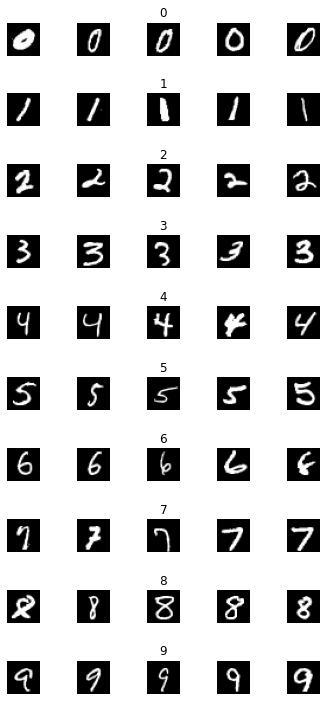

In [5]:
num_of_samples=[]
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


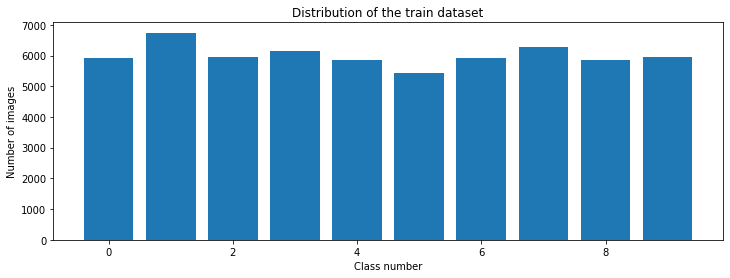

In [7]:
print (num_of_samples)
plt.figure (figsize=(12,4))
plt.bar(range (0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [0]:
#Define the leNet model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [13]:
model = leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [14]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.1, batch_size=400, verbose=1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 30s 561us/step - loss: 0.2067 - accuracy: 0.9370 - val_loss: 0.0543 - val_accuracy: 0.9830
Epoch 2/10
54000/54000 [==============================] - 30s 554us/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0382 - val_accuracy: 0.9895
Epoch 3/10
54000/54000 [==============================] - 30s 554us/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0495 - val_accuracy: 0.9868
Epoch 4/10
54000/54000 [==============================] - 30s 552us/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0443 - val_accuracy: 0.9892
Epoch 5/10
54000/54000 [==============================] - 30s 556us/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0362 - val_accuracy: 0.9905
Epoch 6/10
54000/54000 [==============================] - 30s 554us/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.0581 - val_accuracy: 0.9838
Epoch 7/10
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

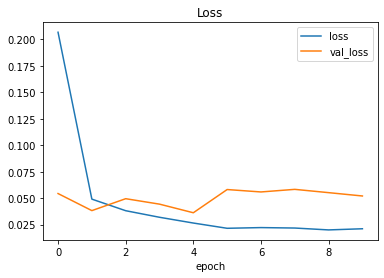

In [15]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.legend (['loss', 'val_loss'])
plt.title ('Loss')
plt.xlabel ('epoch')

Text(0.5, 0, 'epoch')

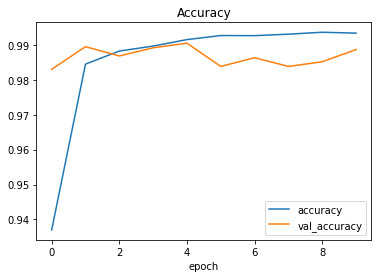

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [0]:
import requests
import cv2
from PIL import Image

<Response [200]>


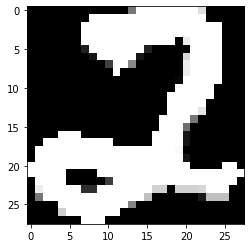

In [18]:
#NUMBER 2
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
image = image/255
image = image.reshape(1, 28, 28, 1)

In [19]:
prediction = model.predict_classes(image)
print ("predicted digit : ", str(prediction))

predicted digit :  [2]
